(4032, 3024, 3)
(4032, 3024, 3)
1


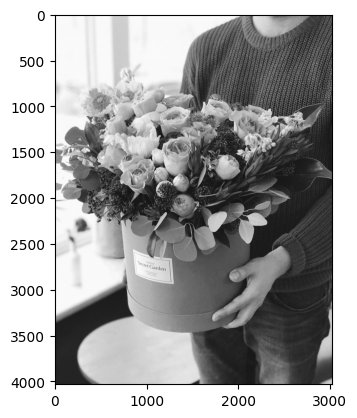

In [83]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2

image_array = plt.imread('./flower.jpg')
print(image_array.shape)


print(image_array.shape)
if len(image_array.shape) == 3:
    image_array = image_array.mean(axis=2)

scale = int(4096/max(image_array.shape))
print(scale)
image_array = cv2.resize(
    image_array, (image_array.shape[1] * scale, image_array.shape[0] * scale))
plt.imshow(image_array, cmap='gray')
plt.show()

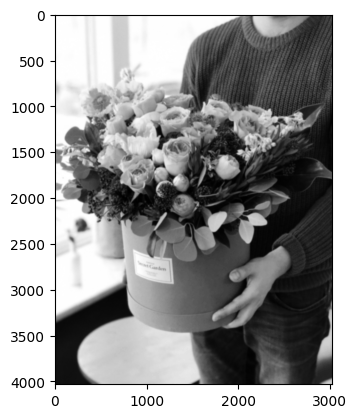

In [84]:
convo_out_blur = scipy.ndimage.gaussian_filter(image_array, sigma=5)
plt.imshow(convo_out_blur,cmap="gray")

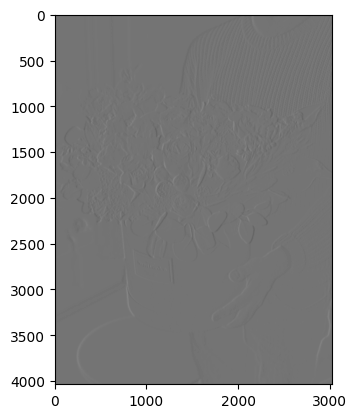

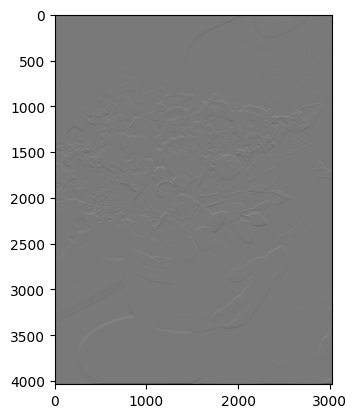

In [85]:
big_vert_sobel =np.array( [[1,  2, 0,  -2, -1],
                            [4,  8, 0,  -8, -4],
                            [6, 12, 0, -12, -6],
                            [4,  8, 0,  -8, -4],
                            [1,  2, 0,  -2, -1]])
convo_out_vert = scipy.signal.convolve2d(convo_out_blur, big_vert_sobel)
plt.imshow(convo_out_vert,cmap="gray")
plt.show()
big_horz_sobel = big_vert_sobel.T
convo_out_horiz = scipy.signal.convolve2d(convo_out_blur, big_horz_sobel)
plt.imshow(convo_out_horiz,cmap="gray")
plt.show()

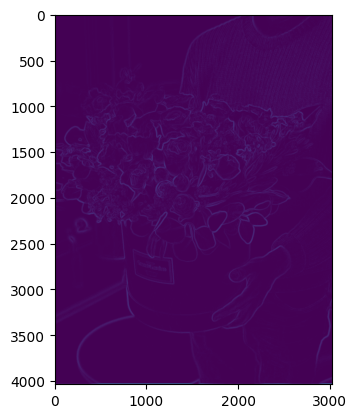

In [86]:
conv_out_mag = (convo_out_vert**2 + convo_out_horiz**2)**0.5
conv_out_mag_norm = conv_out_mag / (255*2)
plt.imshow(conv_out_mag)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


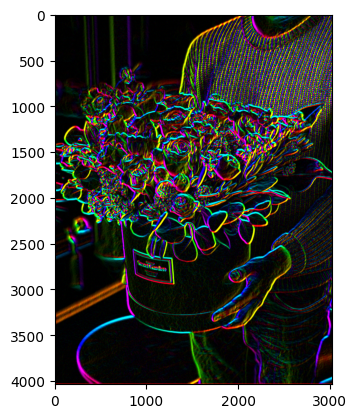

In [87]:

conv_dir = np.arctan2(convo_out_vert,(convo_out_horiz));
conv_dir_norm = (conv_dir + np.pi)/ (np.pi*2)
rgb_image = matplotlib.colors.hsv_to_rgb(np.stack((conv_dir_norm,
                                                   np.ones_like(conv_dir_norm),
                                                   conv_out_mag_norm),
                                                   axis = -1))
plt.imshow(rgb_image)